***Fase 1 importar librerias necesarias - cargar datos***

In [ ]:
!pip install matplotlib-venn
from scipy.special import comb
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
try:  # SciPy >= 0.19
    from scipy.special import comb, logsumexp
except ImportError:
    from scipy.misc import comb, logsumexp
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier 
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, validation_curve,train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform, randint
import plotly.graph_objects as go
! pip install --upgrade category_encoders
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import norm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Cargamos datos

In [ ]:
X_train = pd.read_csv("/content/train.csv")
Y_test = pd.read_csv('/content/sample_submission.csv')
X_test = pd.read_csv("/content/test.csv")

**Fase 2: Descripción, evaluación  y tratamiento de los datos**

Ahora vamos a ver las dimensiones de entrenemiento y test

In [ ]:
X_train.shape, X_test.shape, Y_test.shape

((1460, 81), (1459, 80), (1459, 2))

In [ ]:
X_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
Y_test.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


Comprobación de ID únicas

In [ ]:
Id_unicas=len(X_train['Id'].unique())
Id_unicast=len(X_test['Id'].unique())

print(Id_unicas, Id_unicast)



1460 1459


In [ ]:
X_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Eliminamos los ID

In [ ]:
X_train = X_train.set_index("Id")
X_test = X_test.set_index("Id")
Y_test = Y_test.set_index("Id")


Comprobación de valores nulos


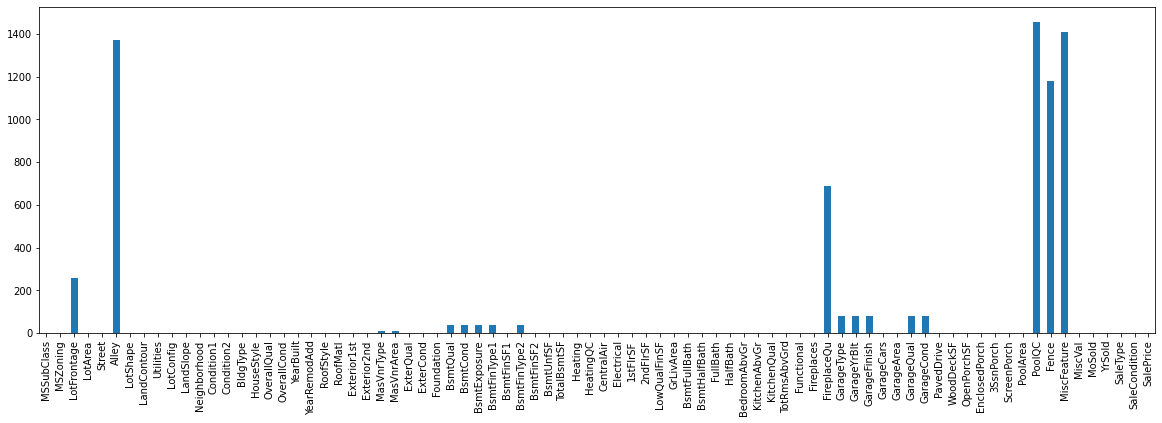

In [ ]:
X_train.isna().sum().plot(kind='bar',figsize=(20,6))

Datos que se extraen de esta gráfica: de 1460 datos por columna en:


*   Alley (acceso por por callejón tiene casi 1400 de casos pérdidos)
*   Fence:calidad del "vallado" casi 1200 casos de 1400 pérdidos
*   FireplaceQu': Calidad de la chimenea en torno a la mitad de casos pérdidos
*   MiscFeature', Caracteristicas que no entran en otras categorias, casi 1400  
    casos pérdidos
*   PoolQC: Calidad de la piscina (apenas tiene datos esta categoria)








 




Por tanto vamos a eliminar las  variables 'Alley', 'Fence', 'FireplaceQu', 'MiscFeature' y 'PoolQC' que tienen más de la mitad de los datos nulos. 

In [ ]:
columnas_borrar=['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC' ]
X_train = X_train.drop(X_train[columnas_borrar], axis = 1)
X_test = X_test.drop(X_test[columnas_borrar], axis = 1)

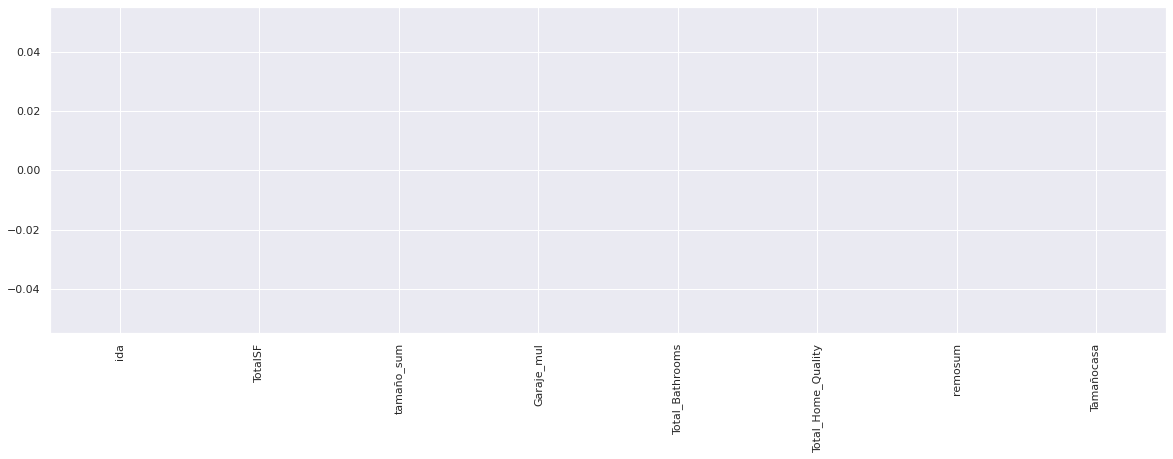

In [ ]:
X_test.isna().sum().plot(kind='bar',figsize=(20,6))

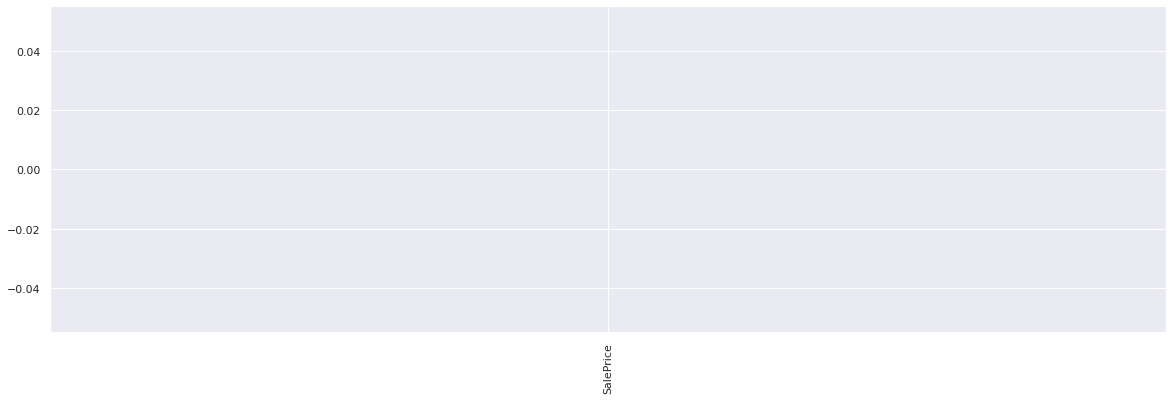

In [ ]:
Y_test.isna().sum().plot(kind='bar',figsize=(20,6))

Vamos a quitar los valores perdidos de las variables númericas utilizando la media

In [ ]:
#Primero con Train
c_num=X_train.columns[X_train.dtypes!='object']

imp_median = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median.fit(X_train[c_num])

array_X_train_numerical= imp_median.transform(X_train[c_num])
X_train[c_num] = pd.DataFrame(array_X_train_numerical, columns=c_num, index=X_train.index)

# Despues con Test 
c_num=X_test.columns[X_test.dtypes!='object']

imp_median = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median.fit(X_test[c_num])

array_X_test_numerical= imp_median.transform(X_test[c_num])
X_test[c_num] = pd.DataFrame(array_X_test_numerical, columns=c_num, index=X_test.index)


Ahora con las categóricas, sustituyendo el valor perdido por el más frecuente

In [ ]:
#Primero con Train
c_cat=X_train.columns[X_train.dtypes=='object']
imp_cat=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(X_train[c_cat])
X_train[c_cat]=imp_cat.fit_transform(X_train[c_cat])

array_X_train_numerical= imp_cat.transform(X_train[c_cat])
X_train[c_cat] = pd.DataFrame(array_X_train_numerical, columns=c_cat, index=X_train.index)

#Despues con Test

c_cat=X_test.columns[X_test.dtypes=='object']
imp_cat=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(X_test[c_cat])
X_test[c_cat]=imp_cat.fit_transform(X_test[c_cat])

array_X_test_numerical= imp_cat.transform(X_test[c_cat])
X_test[c_cat] = pd.DataFrame(array_X_test_numerical, columns=c_cat, index=X_test.index)

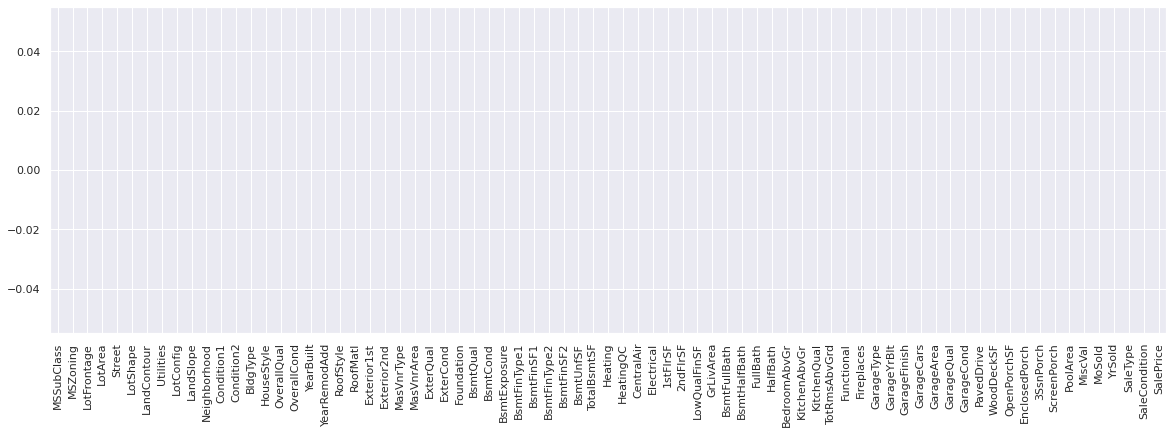

In [ ]:
X_train.isna().sum().plot(kind='bar',figsize=(20,6))

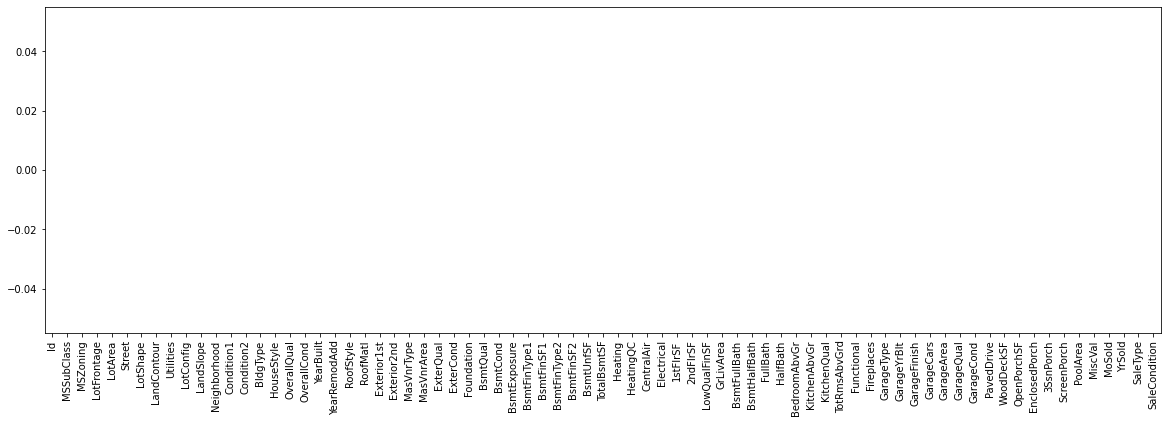

In [ ]:
X_test.isna().sum().plot(kind='bar',figsize=(20,6))

Todos los valores nulos han desaparecido

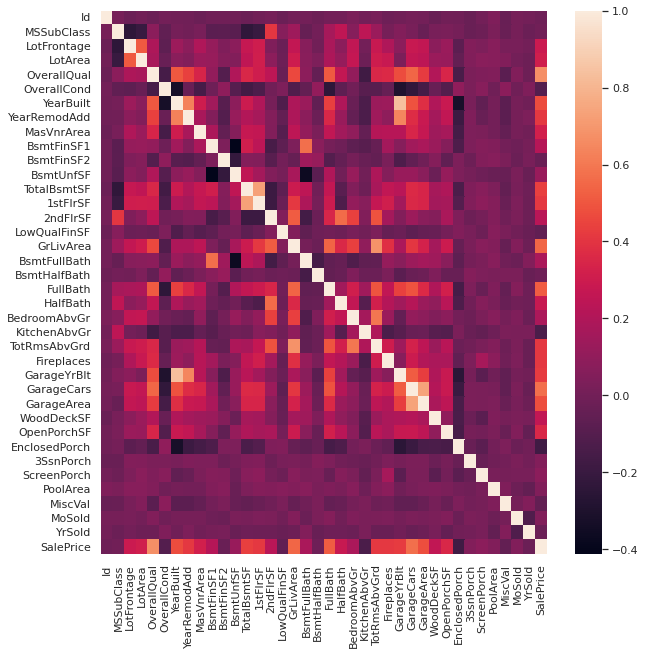

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(X_train.corr(method='kendall'), ax=ax);

Las variables con más alta relacíon son 


*   Grivárea con totsrmABV (Tiene lógica que las casas con más habitaciones  sean casas más grandes)
*   Garaje área y garaje cars (A más coches en un garaje más grande tiene que ser este)
*   1stfirst con Total BSMT ( A mayor tamaño del primer piso mayor tiene que ser la bodega
*   Year Built, Year remodd Area(Cuánto más antigua más posibilidad de que la casa este reformada






Correlaciones con la variable objetivo

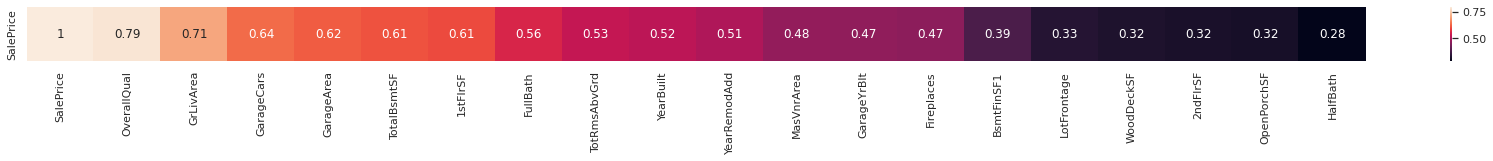

In [ ]:
htmap = X_train.corr()
mx_htmp =  htmap.nlargest(20,"SalePrice")[["SalePrice"]].T
fig,ax = plt.subplots(figsize = (30,1))
sns.heatmap(mx_htmp, annot = True, vmax = 0.8)

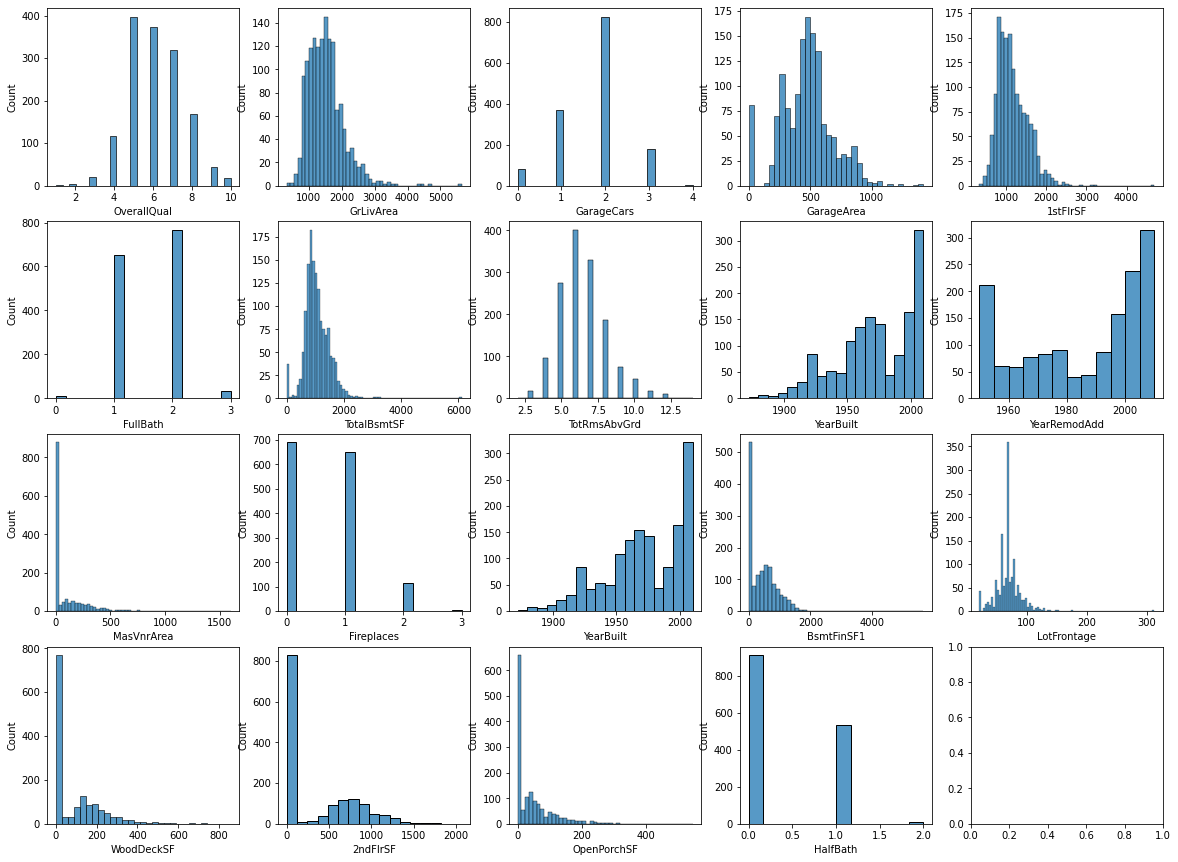

In [ ]:
fig, ax = plt.subplots(4,5, figsize = (20,15))
sns.histplot(x = "OverallQual",data = X_train, ax = ax[0,0])
sns.histplot(x = "GrLivArea", data = X_train,ax = ax[0,1])
sns.histplot(x = "GarageCars", data = X_train,ax = ax[0,2])
sns.histplot(x = "GarageArea", data = X_train,ax = ax[0,3])
sns.histplot(x = "1stFlrSF", data = X_train,ax = ax[0,4])
sns.histplot(x = "FullBath", data = X_train,ax = ax[1,0])
sns.histplot(x = "TotalBsmtSF", data = X_train,ax = ax[1,1])
sns.histplot(x = "TotRmsAbvGrd", data = X_train,ax = ax[1,2])
sns.histplot(x = "YearBuilt", data = X_train,ax = ax[1,3])
sns.histplot(x = "YearRemodAdd", data = X_train,ax = ax[1,4])
sns.histplot(x = "MasVnrArea", data = X_train,ax = ax[2,0])
sns.histplot(x = "Fireplaces", data = X_train,ax = ax[2,1])
sns.histplot(x = "YearBuilt", data = X_train,ax = ax[2,2])
sns.histplot(x = "BsmtFinSF1", data = X_train,ax = ax[2,3])
sns.histplot(x = "LotFrontage", data = X_train,ax = ax[2,4])
sns.histplot(x = "WoodDeckSF", data = X_train,ax = ax[3,0])
sns.histplot(x = "2ndFlrSF", data = X_train,ax = ax[3,1])
sns.histplot(x = "OpenPorchSF", data = X_train,ax = ax[3,2])
sns.histplot(x = "HalfBath", data = X_train,ax = ax[3,3])

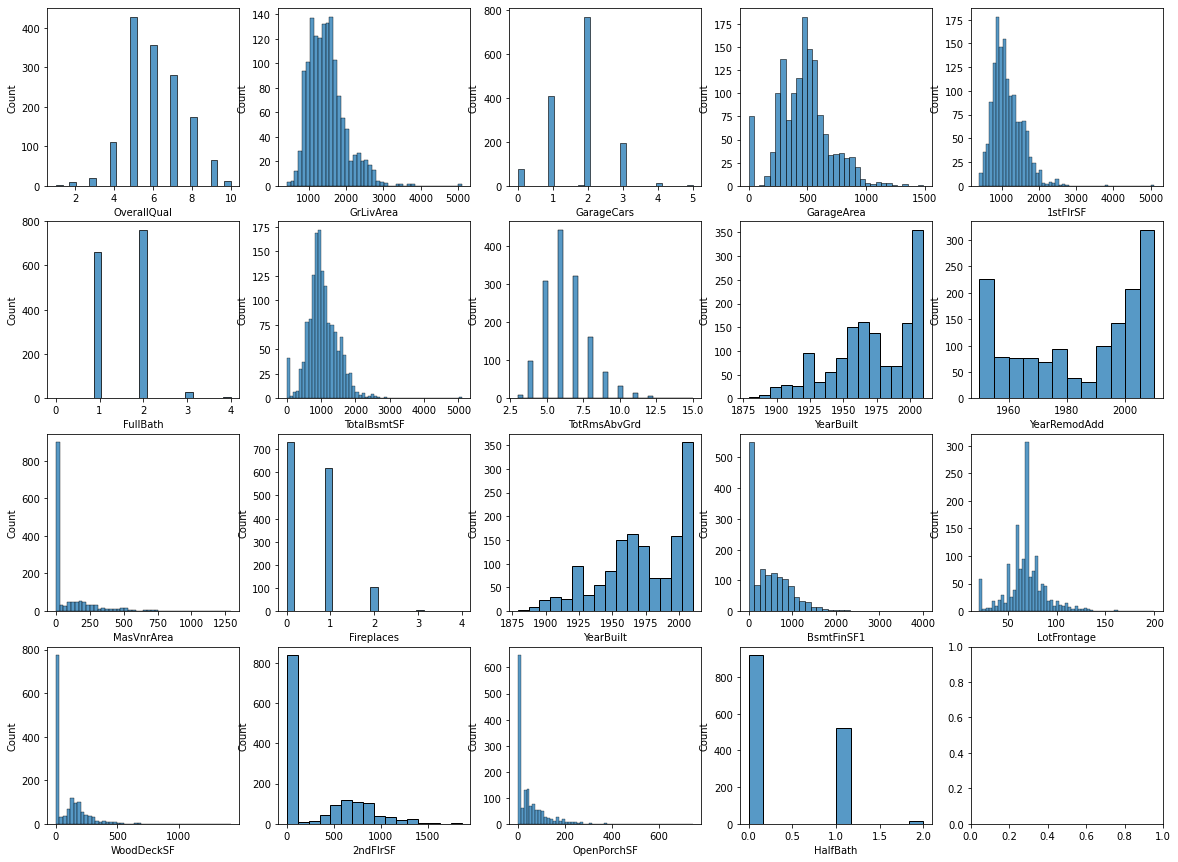

In [ ]:
fig, ax = plt.subplots(4,5, figsize = (20,15))
sns.histplot(x = "OverallQual",data = X_test, ax = ax[0,0])
sns.histplot(x = "GrLivArea", data = X_test,ax = ax[0,1])
sns.histplot(x = "GarageCars", data = X_test,ax = ax[0,2])
sns.histplot(x = "GarageArea", data = X_test,ax = ax[0,3])
sns.histplot(x = "1stFlrSF", data = X_test,ax = ax[0,4])
sns.histplot(x = "FullBath", data = X_test,ax = ax[1,0])
sns.histplot(x = "TotalBsmtSF", data = X_test,ax = ax[1,1])
sns.histplot(x = "TotRmsAbvGrd", data = X_test,ax = ax[1,2])
sns.histplot(x = "YearBuilt", data = X_test,ax = ax[1,3])
sns.histplot(x = "YearRemodAdd", data = X_test,ax = ax[1,4])
sns.histplot(x = "MasVnrArea", data = X_test,ax = ax[2,0])
sns.histplot(x = "Fireplaces", data = X_test,ax = ax[2,1])
sns.histplot(x = "YearBuilt", data = X_test,ax = ax[2,2])
sns.histplot(x = "BsmtFinSF1", data = X_test,ax = ax[2,3])
sns.histplot(x = "LotFrontage", data = X_test,ax = ax[2,4])
sns.histplot(x = "WoodDeckSF", data =X_test,ax = ax[3,0])
sns.histplot(x = "2ndFlrSF", data = X_test,ax = ax[3,1])
sns.histplot(x = "OpenPorchSF", data = X_test,ax = ax[3,2])
sns.histplot(x = "HalfBath", data =X_test,ax = ax[3,3])

Modificación de variables númericas y categoricas


In [ ]:
cols_numericas_train = X_train.columns[X_train.dtypes != "object"]
cols_numericas_test = X_test.columns[X_test.dtypes != "object"]
cols_categoricas_train = X_train.columns[X_train.dtypes == "object"]
cols_categoricas_test = X_test.columns[X_test.dtypes == "object"]

In [ ]:
ohencoder = ce.OneHotEncoder(cols=cols_categoricas_train, use_cat_names=True)
X_train = ohencoder.fit_transform(X_train)
ohencoder = ce.OneHotEncoder(cols=cols_categoricas_test, use_cat_names=True)
X_test = ohencoder.fit_transform(X_test)

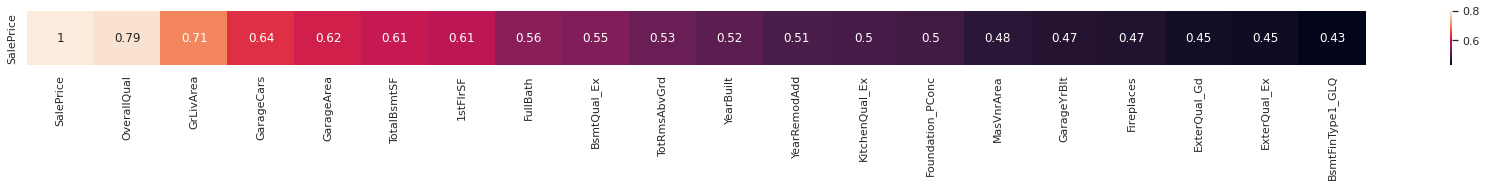

In [ ]:
htmap = X_train.corr()
mx_htmp =  htmap.nlargest(20,"SalePrice")[["SalePrice"]].T
fig,ax = plt.subplots(figsize = (30,1))
sns.heatmap(mx_htmp, annot = True, vmax = 0.8)

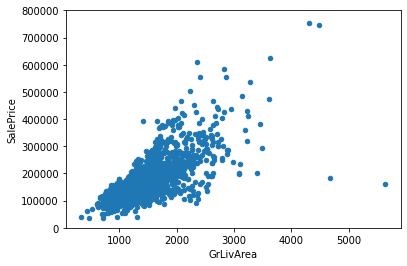

In [ ]:
var = 'GrLivArea'
data = pd.concat([X_train['SalePrice'], X_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

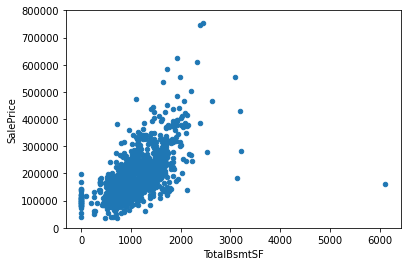

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([X_train['SalePrice'], X_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


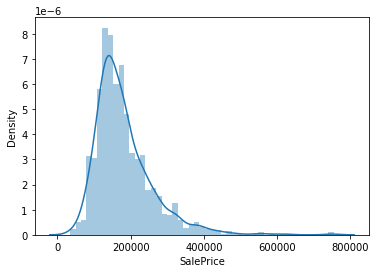

In [ ]:
sns.distplot(X_train['SalePrice'])

In [ ]:
X_train =X_train.drop([1299,441,179,524, 1170, 692, 1183, 899, 804, 1047, 770, 179])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


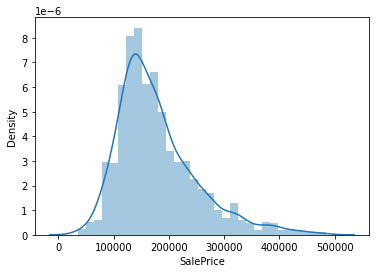

In [ ]:
sns.distplot(X_train['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


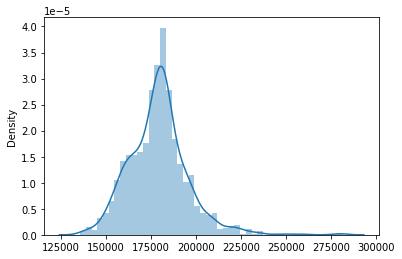

In [ ]:
sns.distplot(Y_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


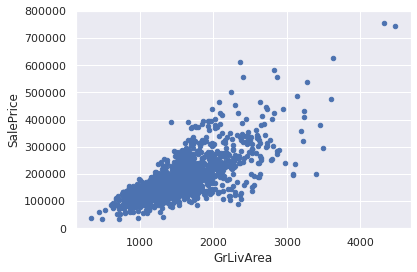

In [ ]:
var = 'GrLivArea'
data = pd.concat([X_train['SalePrice'], X_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Los outliers de  X_train han sido eliminados

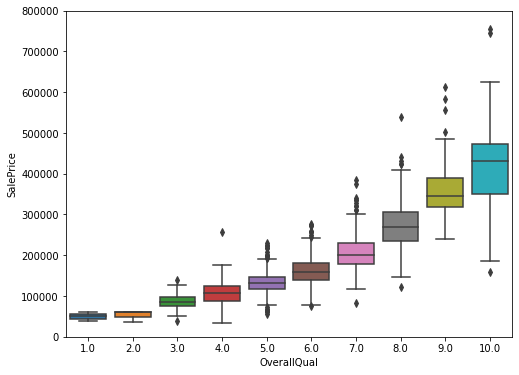

In [ ]:
var = 'OverallQual'
data = pd.concat([X_train['SalePrice'], X_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


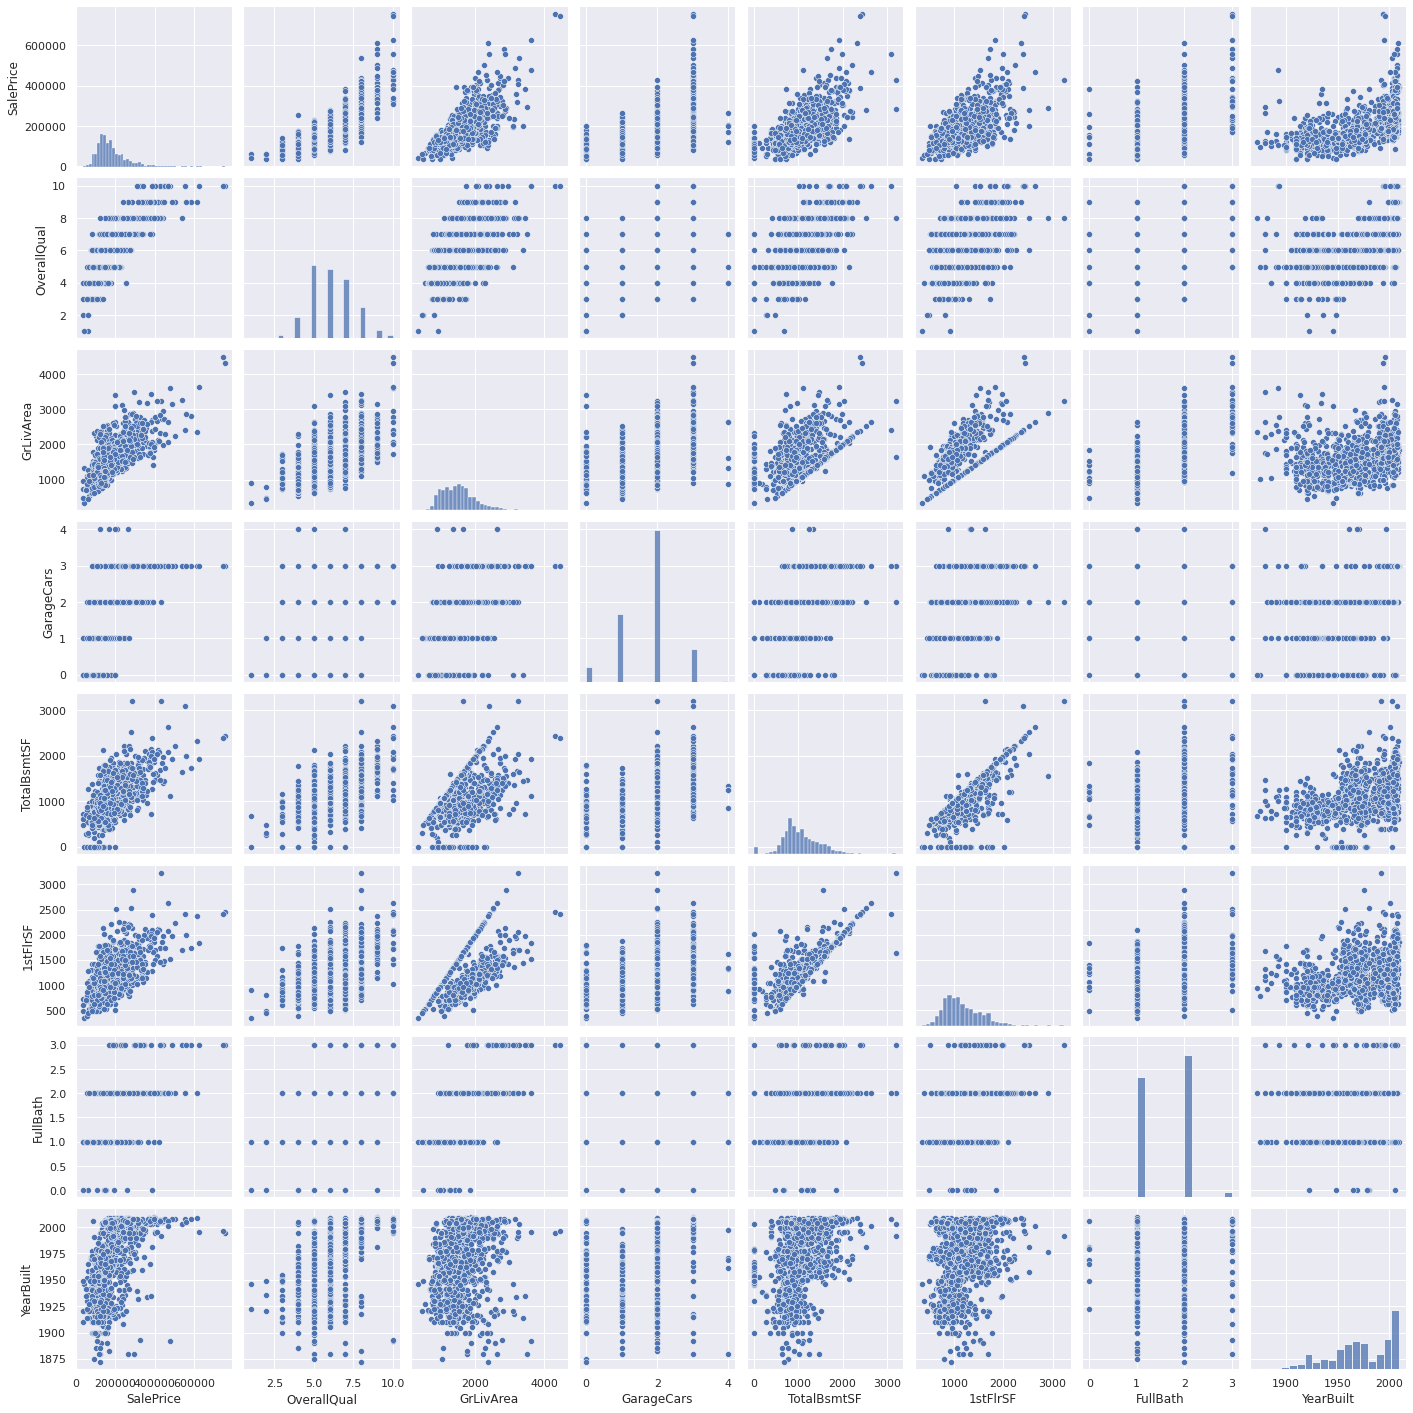

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',"1stFlrSF", 'FullBath', 'YearBuilt']
sns.pairplot(X_train[cols], size = 2.5)
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


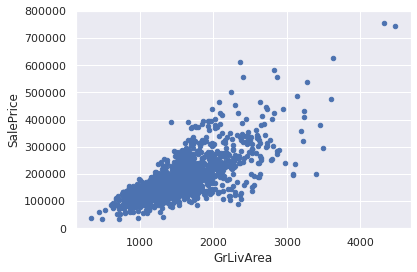

In [ ]:
var = 'GrLivArea'
data = pd.concat([X_train['SalePrice'], X_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Se va a normalizar las variables más importantes

In [ ]:
X_train.dtypes

Id                       float64
MSSubClass               float64
MSZoning_RL                int64
MSZoning_RM                int64
MSZoning_C (all)           int64
MSZoning_FV                int64
MSZoning_RH                int64
LotFrontage              float64
LotArea                  float64
Street_Pave                int64
Street_Grvl                int64
LotShape_Reg               int64
LotShape_IR1               int64
LotShape_IR2               int64
LotShape_IR3               int64
LandContour_Lvl            int64
LandContour_Bnk            int64
LandContour_Low            int64
LandContour_HLS            int64
Utilities_AllPub           int64
Utilities_NoSeWa           int64
LotConfig_Inside           int64
LotConfig_FR2              int64
LotConfig_Corner           int64
LotConfig_CulDSac          int64
LotConfig_FR3              int64
LandSlope_Gtl              int64
LandSlope_Mod              int64
LandSlope_Sev              int64
Neighborhood_CollgCr       int64
Neighborho

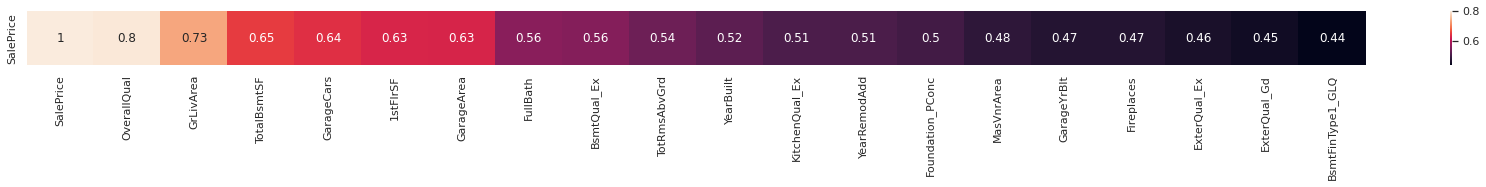

In [ ]:
htmap = X_train.corr()
mx_htmp =  htmap.nlargest(20,"SalePrice")[["SalePrice"]].T
fig,ax = plt.subplots(figsize = (30,1))
sns.heatmap(mx_htmp, annot = True, vmax = 0.8)

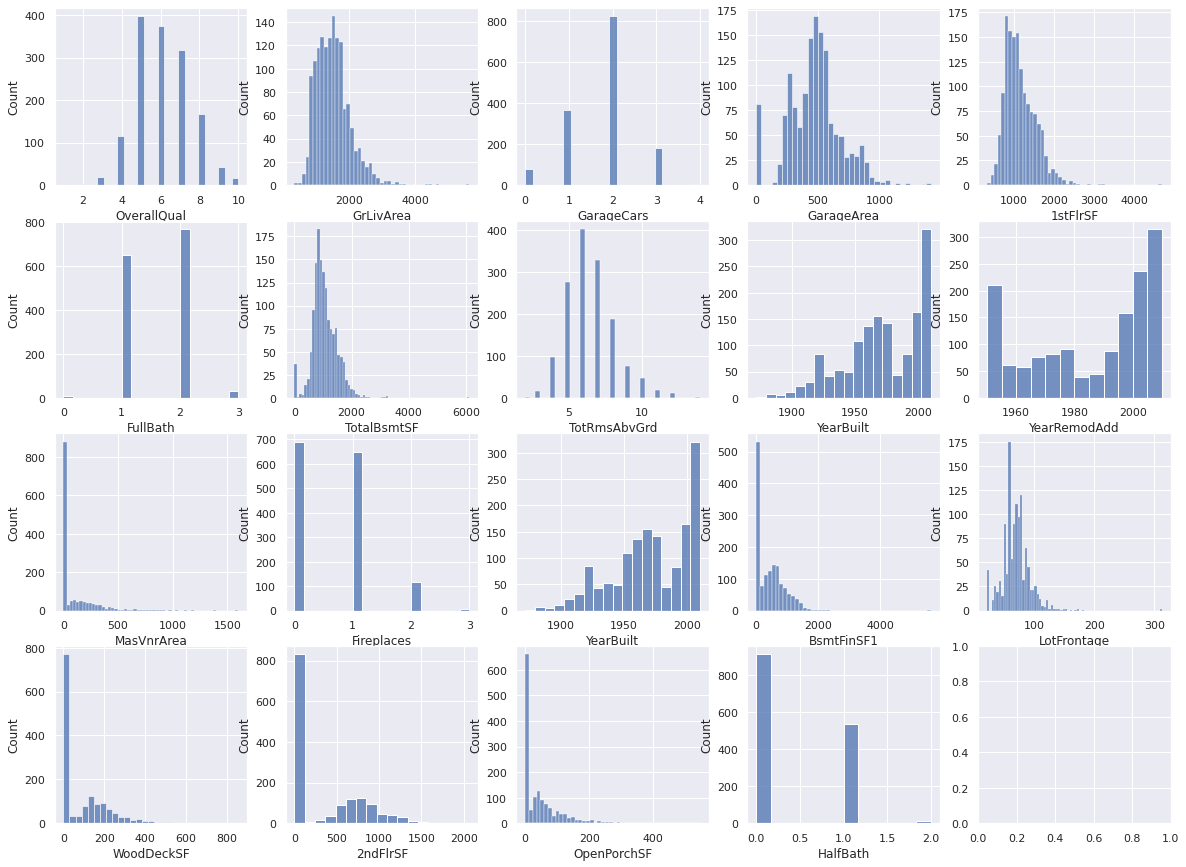

In [ ]:
fig, ax = plt.subplots(4,5, figsize = (20,15))
sns.histplot(x = "OverallQual",data = X_train, ax = ax[0,0])
sns.histplot(x = "GrLivArea", data = X_train,ax = ax[0,1])
sns.histplot(x = "GarageCars", data = X_train,ax = ax[0,2])
sns.histplot(x = "GarageArea", data = X_train,ax = ax[0,3])
sns.histplot(x = "1stFlrSF", data = X_train,ax = ax[0,4])
sns.histplot(x = "FullBath", data = X_train,ax = ax[1,0])
sns.histplot(x = "TotalBsmtSF", data = X_train,ax = ax[1,1])
sns.histplot(x = "TotRmsAbvGrd", data = X_train,ax = ax[1,2])
sns.histplot(x = "YearBuilt", data = X_train,ax = ax[1,3])
sns.histplot(x = "YearRemodAdd", data = X_train,ax = ax[1,4])
sns.histplot(x = "MasVnrArea", data = X_train,ax = ax[2,0])
sns.histplot(x = "Fireplaces", data = X_train,ax = ax[2,1])
sns.histplot(x = "YearBuilt", data = X_train,ax = ax[2,2])
sns.histplot(x = "BsmtFinSF1", data = X_train,ax = ax[2,3])
sns.histplot(x = "LotFrontage", data = X_train,ax = ax[2,4])
sns.histplot(x = "WoodDeckSF", data = X_train,ax = ax[3,0])
sns.histplot(x = "2ndFlrSF", data = X_train,ax = ax[3,1])
sns.histplot(x = "OpenPorchSF", data = X_train,ax = ax[3,2])
sns.histplot(x = "HalfBath", data = X_train,ax = ax[3,3])

In [ ]:
X_train.head(5)

,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,LotFrontage,LotArea,Street_Pave,Street_Grvl,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_Low,LandContour_HLS,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_PosA,Condition1_RRNe,Condition2_Norm,Condition2_Artery,Condition2_RRNn,Condition2_Feedr,Condition2_PosN,Condition2_PosA,Condition2_RRAn,Condition2_RRAe,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_Twnhs,HouseStyle_2Story,HouseStyle_1Story,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_2.5Unf,HouseStyle_2.5Fin,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Flat,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_WdShngl,RoofMatl_Metal,RoofMatl_WdShake,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior1st_HdBoard,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_CemntBd,Exterior1st_Plywood,Exterior1st_AsbShng,Exterior1st_Stucco,Exterior1st_BrkComm,Exterior1st_AsphShn,Exterior1st_Stone,Exterior1st_ImStucc,Exterior1st_CBlock,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_Wd Shng,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_BrkCmn,MasVnrArea,ExterQual_Gd,ExterQual_TA,ExterQual_Ex,ExterQual_Fa,ExterCond_TA,ExterCond_Gd,ExterCond_Fa,ExterCond_Po,ExterCond_Ex,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtCond_TA,BsmtCond_Gd,BsmtCond_Fa,BsmtCond_Po,BsmtExposure_No,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Av,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_Unf,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinSF1,BsmtFinType2_Unf,BsmtFinType2_BLQ,BsmtFinType2_ALQ,BsmtFinType2_Rec,BsmtFinType2_LwQ,BsmtFinType2_GLQ,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_Fa,HeatingQC_Po,CentralAir_Y,CentralAir_N,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa,TotRmsAbvGrd,Functional_Typ,Functional_Min1,Functional_Maj1,Functional_Min2,Functional_Mod,Functional_Maj2,Functional_Sev,Fireplaces,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Basment,GarageType_2Types,GarageYrBlt,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,GarageCars,GarageArea,GarageQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Ex,GarageQual_Po,GarageCond_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_Ex,PavedDrive_Y,PavedDrive_N,PavedDrive_P,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Mi

In [ ]:

X_train['remosum']=X_train['YearBuilt']+X_train['YearRemodAdd']
X_train['remomul']=X_train['YearBuilt']*X_train['YearRemodAdd']
X_train['TotalSF']=X_train['TotalBsmtSF'] +X_train['1stFlrSF'] + X_train['2ndFlrSF']
X_train['TotalSFmul']=X_train['TotalBsmtSF'] +X_train['1stFlrSF'] + X_train['2ndFlrSF']

X_train['Total_Bathrooms'] = (X_train['FullBath'] + (0.5 *X_train['HalfBath']) +
                               X_train['BsmtFullBath'] + (0.5 * X_train['BsmtHalfBath']))

X_train['tamaño_sum']=(X_train["GrLivArea"]+X_train["TotRmsAbvGrd"])
X_train['tamaño_mul']=(X_train["GrLivArea"]*X_train["TotRmsAbvGrd"])
X_train['Garaje_sum']=(X_train["GarageArea"]+X_train["GarageCars"])
X_train['Garaje_mul']=(X_train["GarageArea"]*X_train["GarageCars"])  

X_train['ida']=(X_train["GrLivArea"]*X_train["OverallQual"]) 

X_train["Tamañocasa"] = X_train["GrLivArea"] / (X_train["TotRmsAbvGrd"] +
                                                       X_train["FullBath"] +
                                                       X_train["HalfBath"] +
                                                       X_train["KitchenAbvGr"])

X_train['Total_Home_Quality'] = X_train['OverallQual'] + X_train['OverallCond']


X_train['Total_porch_sf'] = (X_train['OpenPorchSF'] + X_train['3SsnPorch'] +
                              X_train['EnclosedPorch'] + X_train['ScreenPorch'] +
                              X_train['WoodDeckSF'])



In [ ]:
X_test['remosum']=X_test['YearBuilt']+X_test['YearRemodAdd']
X_test['remomul']=X_test['YearBuilt']*X_test['YearRemodAdd']
X_test['TotalSF']=X_test['TotalBsmtSF'] +X_test['1stFlrSF'] + X_test['2ndFlrSF']
X_test['TotalSFmul']=X_test['TotalBsmtSF'] +X_test['1stFlrSF'] + X_test['2ndFlrSF']

X_test['Total_Bathrooms'] = (X_test['FullBath'] + (0.5 *X_test['HalfBath']) +
                               X_test['BsmtFullBath'] + (0.5 * X_test['BsmtHalfBath']))

X_test['tamaño_sum']=(X_test["GrLivArea"]+X_test["TotRmsAbvGrd"])
X_test['tamaño_mul']=(X_test["GrLivArea"]*X_test["TotRmsAbvGrd"])
X_test['Garaje_sum']=(X_test["GarageArea"]+X_test["GarageCars"])
X_test['Garaje_mul']=(X_test["GarageArea"]*X_test["GarageCars"])  

X_test['ida']=(X_test["GrLivArea"]*X_test["OverallQual"]) 

X_test["Tamañocasa"] = X_test["GrLivArea"] / (X_test["TotRmsAbvGrd"] +
                                                       X_test["FullBath"] +
                                                       X_test["HalfBath"] +
                                                       X_test["KitchenAbvGr"])

X_test['Total_calidad'] = X_test['OverallQual'] +X_test['OverallCond']


X_test['Total_porche'] = (X_test['OpenPorchSF'] + X_test['3SsnPorch'] +
                              X_test['EnclosedPorch'] + X_test['ScreenPorch'] +
                              X_test['WoodDeckSF'])

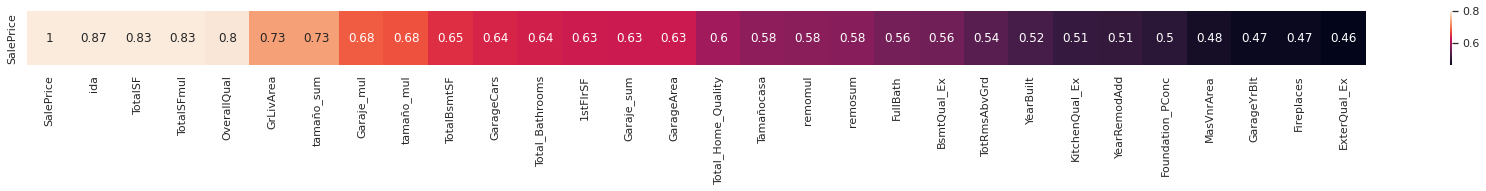

In [ ]:
htmap = X_train.corr()
mx_htmp =  htmap.nlargest(30,"SalePrice")[["SalePrice"]].T
fig,ax = plt.subplots(figsize = (30,1))
sns.heatmap(mx_htmp, annot = True, vmax = 0.8)

In [ ]:
X_train.head(5)

,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,LotFrontage,LotArea,Street_Pave,Street_Grvl,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_Bnk,LandContour_Low,LandContour_HLS,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_PosA,Condition1_RRNe,Condition2_Norm,Condition2_Artery,Condition2_RRNn,Condition2_Feedr,Condition2_PosN,Condition2_PosA,Condition2_RRAn,Condition2_RRAe,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_Twnhs,HouseStyle_2Story,HouseStyle_1Story,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_2.5Unf,HouseStyle_2.5Fin,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Flat,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_WdShngl,RoofMatl_Metal,RoofMatl_WdShake,RoofMatl_Membran,RoofMatl_Tar&Grv,RoofMatl_Roll,RoofMatl_ClyTile,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_Wd Sdng,Exterior1st_HdBoard,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_CemntBd,Exterior1st_Plywood,Exterior1st_AsbShng,Exterior1st_Stucco,Exterior1st_BrkComm,Exterior1st_AsphShn,Exterior1st_Stone,Exterior1st_ImStucc,Exterior1st_CBlock,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_Wd Shng,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_BrkCmn,MasVnrArea,ExterQual_Gd,ExterQual_TA,ExterQual_Ex,ExterQual_Fa,ExterCond_TA,ExterCond_Gd,ExterCond_Fa,ExterCond_Po,ExterCond_Ex,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtCond_TA,BsmtCond_Gd,BsmtCond_Fa,BsmtCond_Po,BsmtExposure_No,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Av,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_Unf,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinSF1,BsmtFinType2_Unf,BsmtFinType2_BLQ,BsmtFinType2_ALQ,BsmtFinType2_Rec,BsmtFinType2_LwQ,BsmtFinType2_GLQ,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,HeatingQC_Fa,HeatingQC_Po,CentralAir_Y,CentralAir_N,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa,TotRmsAbvGrd,Functional_Typ,Functional_Min1,Functional_Maj1,Functional_Min2,Functional_Mod,Functional_Maj2,Functional_Sev,Fireplaces,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Basment,GarageType_2Types,GarageYrBlt,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,GarageCars,GarageArea,GarageQual_TA,GarageQual_Fa,GarageQual_Gd,GarageQual_Ex,GarageQual_Po,GarageCond_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_Ex,PavedDrive_Y,PavedDrive_N,PavedDrive_P,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Mi

In [ ]:
col= ["ida", "TotalSF","tamaño_sum","Garaje_mul","Total_Bathrooms", "Total_calidad",
      "remosum","Tamañocasa", "SalePrice"]
X_train= X_train[col].copy()

In [ ]:
col= ["ida", "TotalSF","tamaño_sum","Garaje_mul","Total_Bathrooms", "Total_calidad",
      "remosum","Tamañocasa"]
X_test= X_test[col].copy()

In [ ]:
X_train[["ida", "TotalSF","tamaño_sum","Garaje_mul","Total_Bathrooms", "Total_calidad",
      "remosum","Tamañocasa", "SalePrice"]] = np.log1p(X_train[["ida", "TotalSF","tamaño_sum","Garaje_mul","Total_Bathrooms", "Total_calidad",
      "remosum","Tamañocasa", "SalePrice"]])

In [ ]:
X_test[["ida", "TotalSF","tamaño_sum","Garaje_mul","Total_Bathrooms", "Total_Home_Quality",
      "remosum","Tamañocasa"]] = np.log1p(X_test[["ida", "TotalSF","tamaño_sum","Garaje_mul","Total_Bathrooms", "Total_Home_Quality",
      "remosum","Tamañocasa"]])

In [ ]:
Y_train = X_train[["SalePrice"]]
X_train = X_train.drop("SalePrice", axis = 1)


[16:48:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

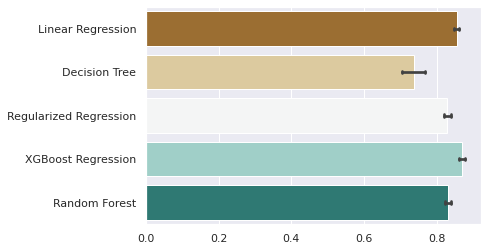

In [ ]:
linear_mdl = LinearRegression()
tree_mdl = DecisionTreeRegressor(random_state = 42)
ridge_mdl = Ridge(alpha = 2)
xgb = XGBRegressor(max_depth=4, n_estimators=1000, random_state=0, learning_rate=0.07, 
                   min_child_weight=4, subsample=0.7)
rand_forest = RandomForestRegressor(max_depth=4, n_estimators=1000, random_state=0)
linear_scores = cross_val_score(linear_mdl,X_train,Y_train,cv = 10)
tree_scores = cross_val_score(tree_mdl,X_train,Y_train,cv = 10)
ridge_scores = cross_val_score(ridge_mdl,X_train,Y_train,cv = 10)
xgb_scores = cross_val_score(xgb,X_train,Y_train,cv = 10)
forest_scores = cross_val_score(rand_forest,X_train,Y_train,cv = 10)
mdl_scores = {}
mdl_scores["Linear Regression"] = linear_scores
mdl_scores["Decision Tree"] = tree_scores
mdl_scores["Regularized Regression"] = ridge_scores
mdl_scores["XGBoost Regression"] = xgb_scores
mdl_scores["Random Forest"] = forest_scores
mdl_scores_pd = pd.DataFrame(mdl_scores)
sns.barplot(data = mdl_scores_pd, palette = "BrBG", capsize = 0.05, orient = "h")

In [ ]:
dict_params = {"n_estimators": [200,250,150],
               "max_depth": [15, 16, 17],
               "learning_rate": [0.03, 0.04, 0.05],
               "objective": ["reg:squarederror"],
               "tree_method": ["hist"],
               "subsample": [0.6],
              }

In [ ]:
shuffle_split = ShuffleSplit(n_splits=5, random_state=0)

In [ ]:
model_XGB = GridSearchCV(estimator=XGBRegressor(random_state=42997296),
                         param_grid=dict_params,
                         cv=shuffle_split,
                         refit=True,
                         verbose=1,
                         n_jobs=-1,
                         return_train_score=True,
                         scoring="neg_mean_squared_error"
                         )

In [ ]:
model_XGB.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=None, train_size=None),
             estimator=XGBRegressor(random_state=42997296), n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.04, 0.05],
                         'max_depth': [15, 16, 17],
                         'n_estimators': [200, 300, 500],
                         'objective': ['reg:squarederror'], 'subsample': [0.6],
                         'tree_method': ['hist']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [ ]:
predictions=model_XGB.predict(X_test)

In [ ]:
predictions = pd.DataFrame(np.expm1(predictions))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.


In [ ]:
print(model_XGB.best_params_)

{'learning_rate': 0.03, 'max_depth': 15, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.6, 'tree_method': 'hist'}


In [ ]:
Predictions = pd.DataFrame(predictions)
Predictions.columns = ["SalePrice"]

In [ ]:
submision = pd.read_csv('/content/sample_submission.csv')

In [ ]:
submision["SalePrice"]=Predictions

In [ ]:
submision.head(3)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570


In [ ]:
submision.to_csv("submission.csv", index = False)

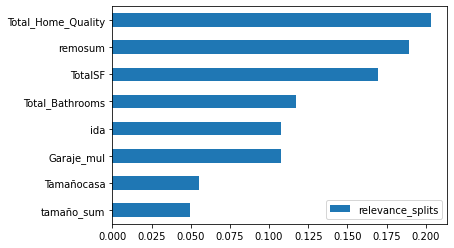

In [ ]:
df_feature_relevance = pd.DataFrame(data={"columns": X_train.columns.tolist(), "relevance_splits": model_XGB.best_estimator_.feature_importances_})
df_feature_relevance.sort_values(by="relevance_splits", ascending=True, inplace=True)
df_feature_relevance.reset_index(drop=True, inplace=True)
plot_feature_relevance = df_feature_relevance.plot(kind="barh")
plot_feature_relevance.set_yticklabels(df_feature_relevance["columns"]);

In [ ]:
def plot_preds_diff(y, y_preds):

    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(20, 8)
    pd.DataFrame({"price": y, "price_pred": y_preds}).plot(kind="scatter", x="price", y="price_pred", ax=ax[0]);
    pd.DataFrame({"price": y, "price_2": y}).sort_values(by="price").plot(x="price", y="price_2", ax=ax[0], color="red", legend=False);

    pd.DataFrame({"price": y, "diff": y_preds - y}).plot(kind="scatter",
                                                                            x="price",
                                                                            y="diff",
                                                                            ax=ax[1]);
    pd.DataFrame({"price": y, "perfect_model": 0}).sort_values(by="price").plot(x="price", y="perfect_model", ax=ax[1], color="red", legend=False)

In [ ]:
def print_metrics(model, X, y):
    y_preds = model.predict(X)    
    print("El ratio entre el mae y la mediana del precio es: {}.".format(mean_absolute_error(y, y_preds) / y.median()))
    print("El ratio entre la raíz cuadrada del mse y la media del precio es: {}".format(np.sqrt(mean_squared_error(y, y_preds)) / y.mean()))
    print("El coeficiente R2 es: {}".format(r2_score(y, y_preds)))

In [ ]:
y_train_preds_xgb = model_XGB.predict(X_train)

print_metrics(model_XGB, X_train, Y_train)

ValueError: ignored

In [ ]:
y_test_preds_xgb = model_XGB.predict(X_test)

print_metrics(model_XGB, X_test, Y_test)

El ratio entre el mae y la mediana del precio es: SalePrice    0.415349
dtype: float64.
El ratio entre la raíz cuadrada del mse y la media del precio es: SalePrice    0.508879
dtype: float64
El coeficiente R2 es: -0.7915465454018413
